In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mplsoccer.pitch import Pitch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from mplsoccer import PyPizza,add_image,FontManager
from io import BytesIO
import requests

In [58]:
df = pd.read_excel("C:/Users/K Raghunandan/OneDrive/Desktop/Raghu/Kickoff/CSV Files/gk_23-2-25.xlsx")

In [59]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Performance,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Player,Squad,Min,90s,GA,GA90,SoTA,Saves,Save%,CS,CS%
1,Alisson,Liverpool,1980,22,25,1.14,69,46,66.7,8,36.4
2,Alphonse Areola,West Ham United,1800,20,37,1.85,108,76,70.4,0,0
3,Altay Bayındır,Manchester Utd,540,6,11,1.83,24,13,54.2,0,0
4,Marco Bizot,Aston Villa,405,4.5,8,1.78,20,13,65,2,50
5,Karl Darlow,Leeds United,990,11,17,1.55,46,30,65.2,1,9.1
6,Gianluigi Donnarumma,Manchester City,2160,24,21,0.87,79,57,73.4,10,41.7
7,Martin Dúbravka,Burnley,2430,27,52,1.93,148,101,68.2,3,11.1
8,Dean Henderson,Crystal Palace,2430,27,32,1.19,101,72,71.3,10,37
9,Mads Hermansen,West Ham United,630,7,12,1.71,32,20,62.5,3,42.9


In [60]:
df.columns = df.iloc[0]

In [61]:
df = df.drop(index=0).reset_index(drop=True)

In [62]:
df

,Player,Squad,Min,90s,GA,GA90,SoTA,Saves,Save%,CS,CS%
0,Alisson,Liverpool,1980,22,25,1.14,69,46,66.7,8,36.4
1,Alphonse Areola,West Ham United,1800,20,37,1.85,108,76,70.4,0,0
2,Altay Bayındır,Manchester Utd,540,6,11,1.83,24,13,54.2,0,0
3,Marco Bizot,Aston Villa,405,4.5,8,1.78,20,13,65,2,50
4,Karl Darlow,Leeds United,990,11,17,1.55,46,30,65.2,1,9.1
5,Gianluigi Donnarumma,Manchester City,2160,24,21,0.87,79,57,73.4,10,41.7
6,Martin Dúbravka,Burnley,2430,27,52,1.93,148,101,68.2,3,11.1
7,Dean Henderson,Crystal Palace,2430,27,32,1.19,101,72,71.3,10,37
8,Mads Hermansen,West Ham United,630,7,12,1.71,32,20,62.5,3,42.9
9,John,Nottingham Forest,437,4.9,8,1.65,13,6,46.2,1,20


In [63]:
df=df[df["90s"]>=10].reset_index()

In [64]:
df

,index,Player,Squad,Min,90s,GA,GA90,SoTA,Saves,Save%,CS,CS%
0,0,Alisson,Liverpool,1980,22,25,1.14,69,46,66.7,8,36.4
1,1,Alphonse Areola,West Ham United,1800,20,37,1.85,108,76,70.4,0,0
2,4,Karl Darlow,Leeds United,990,11,17,1.55,46,30,65.2,1,9.1
3,5,Gianluigi Donnarumma,Manchester City,2160,24,21,0.87,79,57,73.4,10,41.7
4,6,Martin Dúbravka,Burnley,2430,27,52,1.93,148,101,68.2,3,11.1
5,7,Dean Henderson,Crystal Palace,2430,27,32,1.19,101,72,71.3,10,37
6,10,Sam Johnstone,Wolves,1080,12,24,2,62,39,62.9,0,0
7,12,Caoimhín Kelleher,Brentford,2430,27,37,1.37,99,69,66.7,6,22.2
8,13,Senne Lammens,Manchester Utd,1800,20,26,1.3,68,44,64.7,4,20
9,14,Bernd Leno,Fulham,2430,27,41,1.52,106,68,64.2,5,18.5


In [65]:
df["SoTA90"] = df["SoTA"] / df["90s"]

In [66]:
df

,index,Player,Squad,Min,90s,GA,GA90,SoTA,Saves,Save%,CS,CS%,SoTA90
0,0,Alisson,Liverpool,1980,22,25,1.14,69,46,66.7,8,36.4,3.136364
1,1,Alphonse Areola,West Ham United,1800,20,37,1.85,108,76,70.4,0,0,5.4
2,4,Karl Darlow,Leeds United,990,11,17,1.55,46,30,65.2,1,9.1,4.181818
3,5,Gianluigi Donnarumma,Manchester City,2160,24,21,0.87,79,57,73.4,10,41.7,3.291667
4,6,Martin Dúbravka,Burnley,2430,27,52,1.93,148,101,68.2,3,11.1,5.481481
5,7,Dean Henderson,Crystal Palace,2430,27,32,1.19,101,72,71.3,10,37,3.740741
6,10,Sam Johnstone,Wolves,1080,12,24,2,62,39,62.9,0,0,5.166667
7,12,Caoimhín Kelleher,Brentford,2430,27,37,1.37,99,69,66.7,6,22.2,3.666667
8,13,Senne Lammens,Manchester Utd,1800,20,26,1.3,68,44,64.7,4,20,3.4
9,14,Bernd Leno,Fulham,2430,27,41,1.52,106,68,64.2,5,18.5,3.925926


In [67]:
df['Save%'] = pd.to_numeric(df['Save%'])
df['GA90'] = pd.to_numeric(df['GA90'])

In [68]:
#ga90 vs save%

findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not

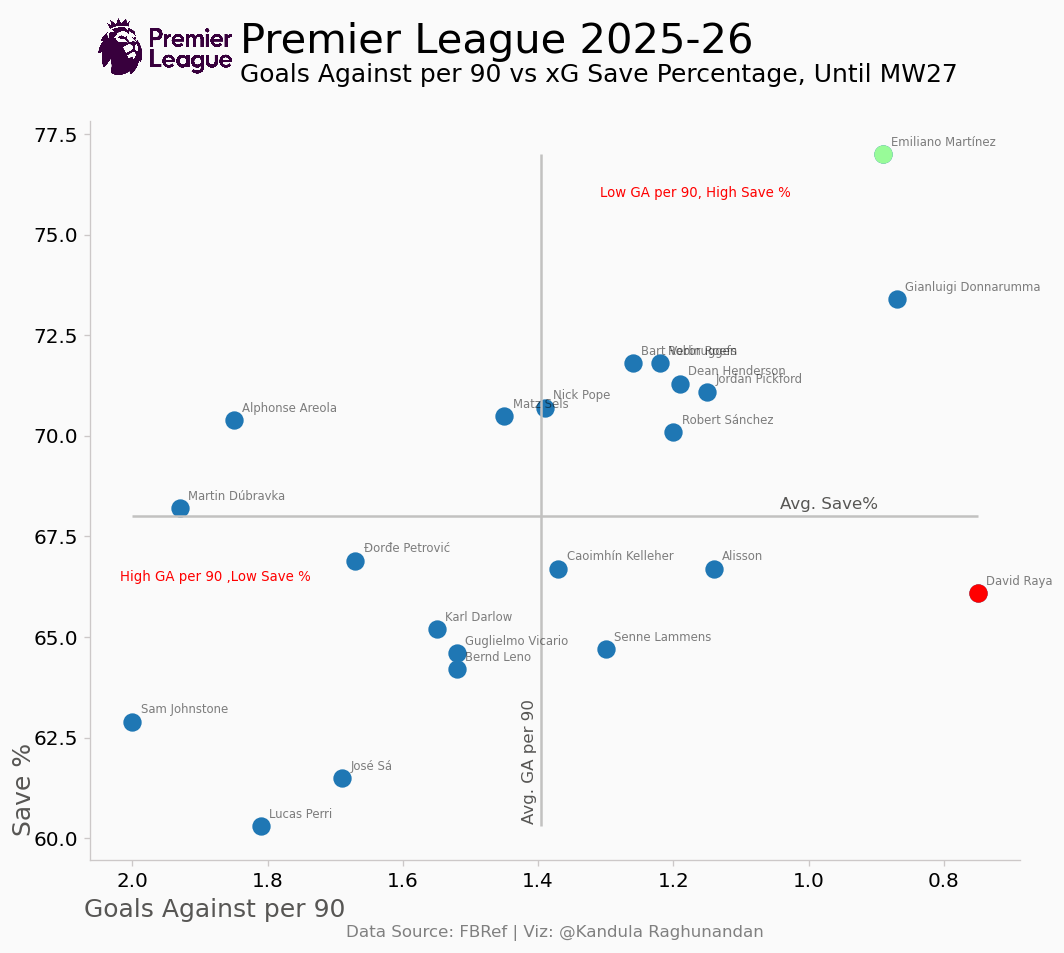

In [98]:
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)

ax.scatter(df['GA90'], df['Save%'], s=100)

for i, player in enumerate(df["Player"]):
    ax.annotate(
        player,
        (
            df["GA90"].iloc[i],
            df["Save%"].iloc[i]
        ),
        xytext=(5, 5),           # distance from point
        textcoords="offset points",
        fontsize=7,
        alpha=0.5
    )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

plt.gca().invert_xaxis()

plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

plt.hlines(df['Save%'].mean(), df['GA90'].min(), df['GA90'].max(), color='#c2c1c0')
plt.vlines(df['GA90'].mean(), df['Save%'].min(), df['Save%'].max(), color='#c2c1c0')

fig.text(.25,.95,'Premier League 2025-26',size=25)
fig.text(.25,.92,'Goals Against per 90 vs xG Save Percentage, Until MW27', size=15)

league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/PREM LOGO (2).png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)
    
add_logo(ax, league_logo, zoom=.04, xy=(0.08, 1.1))

fig.text(.06,.14,'Save %', size=15, color='#575654',rotation=90)
fig.text(.12,0.05,'Goals Against per 90', size=15, color='#575654')

for x in range(len(df["Player"])):
    if df["Player"][x]=="David Raya":
            ax.scatter(x=df["GA90"][x],y=df["Save%"][x],color="red",s=100)

for x in range(len(df["Player"])):
    if df["Player"][x]=="Emiliano Martínez":
            ax.scatter(x=df["GA90"][x],y=df["Save%"][x],color="#98FB98",s=100)

fig.text(.7,.475,'Avg. Save%', size=10, color='#575654')
fig.text(.485,.15,'Avg. GA per 90', size=10, color='#575654',rotation=90)

fig.text(.15,.4,"High GA per 90 ,Low Save % ",color="red",size="8")
fig.text(.55,.8,"Low GA per 90, High Save %",color="red",size="8")

plt.text(
    0.5, -0.099, "Data Source: FBRef | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

plt.savefig("C:/Users/K Raghunandan/Analyst/Results/prem_gk_23-2-26.png",bbox_inches='tight')